In [1]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
pd.set_option('display.float_format','{:.0f}'.format)

In [2]:
unclean_wildfire_df = pd.read_csv("NOAA_csvs/wf_combined_zone_county.csv", encoding="utf-8")

In [3]:
unclean_wildfire_df.columns

Index(['NOAA_FIP', 'NOAA_Zone', 'County', 'FIP', 'Latitude', 'Longitude',
       'NOAA ID', 'County Name', 'Date', 'Type', 'Direct Deaths',
       'Direct Injuries', 'Property Damage', 'Crop Damage',
       'Indirect Injuries', 'Indirect Deaths'],
      dtype='object')

In [4]:
# unclean_wildfire_df['Date'] = unclean_wildfire_df['Date'].replace('/', ' ', regex=True).astype('string')
# unclean_wildfire_df['Date'] = unclean_wildfire_df['Date'].str.slice(start=6)
unclean_wildfire_df = unclean_wildfire_df.sort_values(by=['Date', 'County'])
unclean_wildfire_df

,NOAA_FIP,NOAA_Zone,County,FIP,Latitude,Longitude,NOAA ID,County Name,Date,Type,Direct Deaths,Direct Injuries,Property Damage,Crop Damage,Indirect Injuries,Indirect Deaths
198,55,San Bernardino County Mountains,San Bernardino,71,34,-117,359835,SAN BERNARDINO COUNTY MOUNTAINS (ZONE),01/12/2012,Wildfire,0,2,20000,0,0,0
659,97,NaN,NaN,nan,nan,nan,510074,TULARE CTY MTNS (ZONE),01/13/2014,Wildfire,0,0,0,0,0,0
186,54,Los Angeles County Mountains excluding the San...,Los Angeles,37,34,-118,498029,LOS ANGELES COUNTY MOUNTAINS EXCLUDING THE SAN...,01/16/2014,Wildfire,0,0,0,0,0,0
631,548,Los Angeles County San Gabriel Valley,Los Angeles,37,34,-118,498030,LOS ANGELES COUNTY SAN GABRIEL VALLEY (ZONE),01/16/2014,Wildfire,0,0,0,0,0,0
616,520,Owens Valley,Inyo,27,37,-118,557871,OWENS VALLEY (ZONE),02/06/2015,Wildfire,0,0,1000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,183,Foggy Bottom,Tulare,107,36,-120,nan,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan
505,185,Tulare County,Tulare,107,36,-119,nan,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan
513,191,Southern Sierra Foothills,Tulare,107,36,-119,nan,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan
521,194,Sequoia Kings,Tulare,107,36,-119,nan,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan


In [5]:
unclean_wildfire_df = unclean_wildfire_df.dropna()
unclean_wildfire_df

,NOAA_FIP,NOAA_Zone,County,FIP,Latitude,Longitude,NOAA ID,County Name,Date,Type,Direct Deaths,Direct Injuries,Property Damage,Crop Damage,Indirect Injuries,Indirect Deaths
198,55,San Bernardino County Mountains,San Bernardino,71,34,-117,359835,SAN BERNARDINO COUNTY MOUNTAINS (ZONE),01/12/2012,Wildfire,0,2,20000,0,0,0
186,54,Los Angeles County Mountains excluding the San...,Los Angeles,37,34,-118,498029,LOS ANGELES COUNTY MOUNTAINS EXCLUDING THE SAN...,01/16/2014,Wildfire,0,0,0,0,0,0
631,548,Los Angeles County San Gabriel Valley,Los Angeles,37,34,-118,498030,LOS ANGELES COUNTY SAN GABRIEL VALLEY (ZONE),01/16/2014,Wildfire,0,0,0,0,0,0
616,520,Owens Valley,Inyo,27,37,-118,557871,OWENS VALLEY (ZONE),02/06/2015,Wildfire,0,0,1000,0,0,0
410,73,Mono,Mono,51,38,-119,563191,MONO (ZONE),02/06/2015,Wildfire,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,40,Ventura County Coast,Ventura,111,34,-119,729836,VENTURA COUNTY COAST (ZONE),12/04/2017,Wildfire,1,0,0,0,0,0
92,44,Ventura County Interior Valleys,Ventura,111,34,-119,729837,VENTURA COUNTY INTERIOR VALLEYS (ZONE),12/04/2017,Wildfire,1,0,0,0,0,0
183,53,Ventura County Mountains,Ventura,111,35,-119,729838,VENTURA COUNTY MOUNTAINS (ZONE),12/04/2017,Wildfire,1,0,0,0,0,0
170,50,San Diego County Valleys,San Diego,73,33,-117,731496,SAN DIEGO COUNTY VALLEYS (ZONE),12/07/2017,Wildfire,0,0,30000000,0,0,0


In [6]:
cleaned_wildfire = unclean_wildfire_df[['Date', 'County', 'Property Damage']]
cleaned_wildfire['Date'] = cleaned_wildfire['Date'].replace('/', ' ', regex=True).astype('string')
cleaned_wildfire['Date'] = cleaned_wildfire['Date'].str.slice(start=6)
cleaned_wildfire.head(100)

C:\Users\sun_c\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sun_c\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,County,Property Damage
198,2012,San Bernardino,20000
186,2014,Los Angeles,0
631,2014,Los Angeles,0
616,2015,Inyo,1000
410,2015,Mono,0
...,...,...,...
459,2014,Modoc,0
278,2016,Amador,0
282,2016,Calaveras,0
286,2016,El Dorado,0


In [7]:
property_wildfire = cleaned_wildfire.loc[(cleaned_wildfire['Property Damage'] > 0)]
property_wildfire = property_wildfire.sort_values(by=['Date', 'Property Damage'])
property_wildfire.head(200)

,Date,County,Property Damage
107,2010,Riverside,8000
137,2010,San Bernardino,8000
105,2010,Riverside,17500
135,2010,San Bernardino,17500
215,2010,Orange,400000
...,...,...,...
154,2019,San Bernardino,400000
132,2019,Riverside,4000000
162,2019,San Bernardino,4000000
127,2019,Riverside,8000000


In [45]:
prop_year = property_wildfire.groupby(property_wildfire['Date'])
prop_totals = prop_year.mean()
prop_totals


,Property Damage
Date,
2010,178714
2011,1406250
2012,784857
2013,988000
2014,3009700
2015,257800
2016,13525000
2017,11377778
2018,3389175000


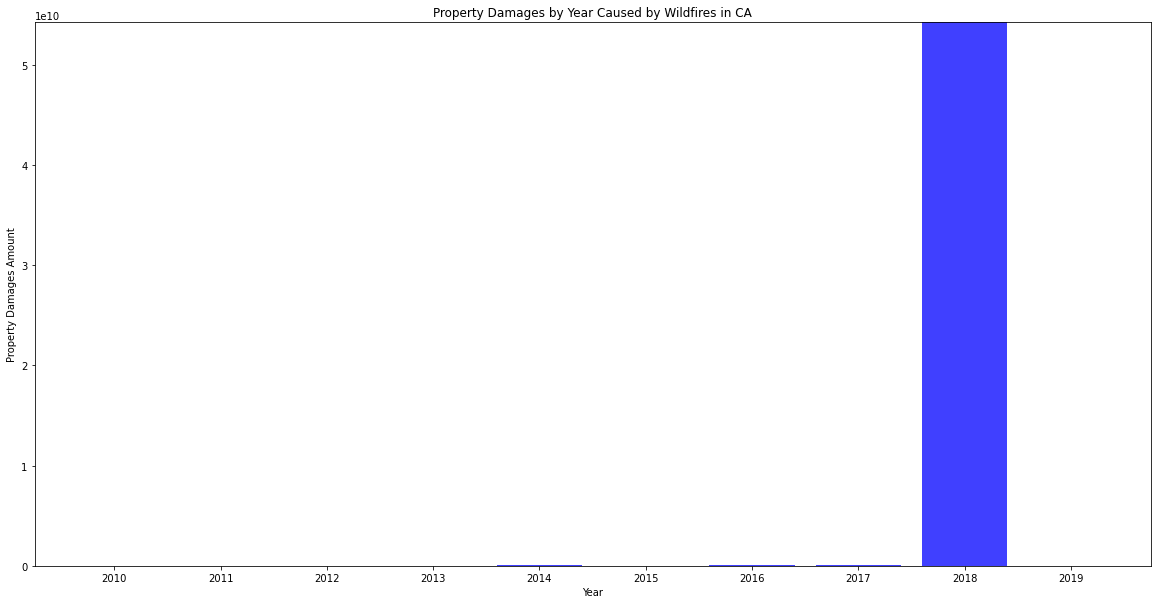

In [74]:
damages = [1251000, 5625000, 5494000, 19760000, 60194000, 5156000, 54100000, 102400000, 54226800000, 25777500]
x_axis = np.arange(len(damages))
plt.figure(figsize=(20,10))
plt.bar(x_axis, damages, color='b', alpha=0.75, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(damages)+500000)
plt.title('Property Damages by Year Caused by Wildfires in CA')
plt.xlabel('Year')
plt.ylabel('Property Damages Amount')
plt.savefig('Chia_pngs/wildfires_all', dpi=300, bbox_inches='tight')
plt.show()

In [48]:
property_2010 = property_wildfire.loc[(property_wildfire['Date'] == '2010')]
property_2010 = property_2010[['Date', 'County', 'Property Damage']]
property_2010 = property_2010.groupby(["Date", "County"]).sum().reset_index()
property_2010 = property_2010[['County', 'Property Damage']]
property_2010 = property_2010.rename(columns={'Property Damage': 'Prop_Damage_2010'})
property_2010 = property_2010.sort_values(by=['Prop_Damage_2010'])
property_2010

,County,Prop_Damage_2010
2,San Bernardino,25500
0,Orange,400000
3,San Diego,400000
1,Riverside,425500


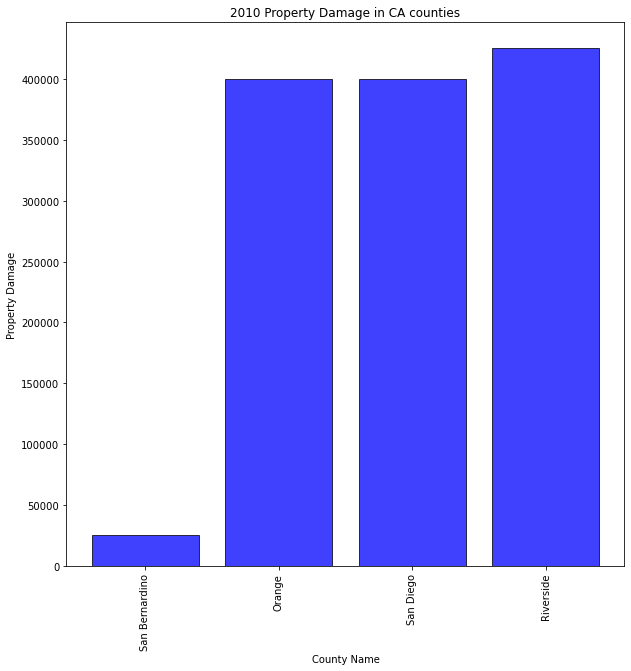

In [76]:
x_axis = np.arange(len(property_2010))
p_tick_loc = [value+0.4 for value in x_axis]
                         
plt.figure(figsize=(10,10))
plt.bar(x_axis , property_2010['Prop_Damage_2010'], color='b', alpha=0.75, align='edge', edgecolor='black')
plt.xticks(p_tick_loc, property_2010['County'], rotation='vertical')

plt.title('2010 Property Damage in CA counties')
plt.xlabel('County Name')
plt.ylabel('Property Damage')
plt.savefig('Chia_pngs/wildfires_2010', dpi=300, bbox_inches='tight')
plt.show()

In [50]:
property_2011 = property_wildfire.loc[(property_wildfire['Date'] == '2011')]
property_2011 = property_2011[['Date', 'County', 'Property Damage']]
property_2011 = property_2011.groupby(["Date", "County"]).sum().reset_index()
property_2011 = property_2011[['County', 'Property Damage']]
property_2011 = property_2011.rename(columns={'Property Damage': 'Prop_Damage_2011'})
property_2011 = property_2011.sort_values(by=['Prop_Damage_2011'])
property_2011

,County,Prop_Damage_2011
2,San Diego,25000
1,San Bernardino,1100000
0,Inyo,4500000


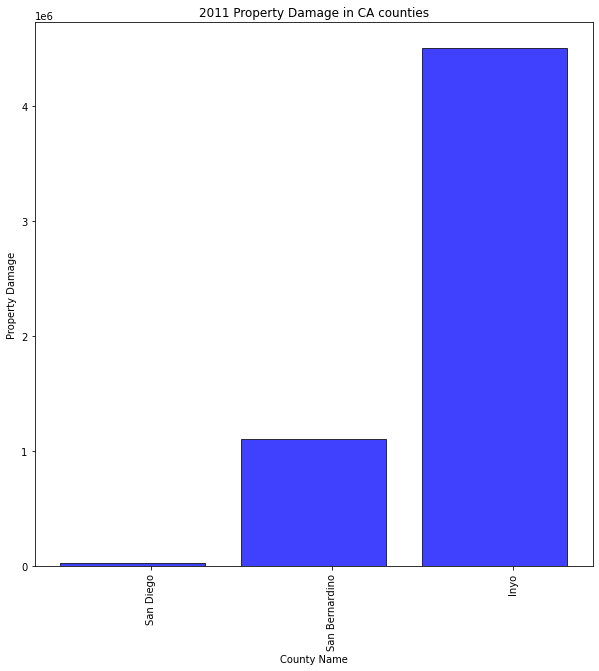

In [77]:
x_axis = np.arange(len(property_2011))
p_tick_loc = [value+0.5 for value in x_axis]
                         
plt.figure(figsize=(10,10))
plt.bar(x_axis , property_2011['Prop_Damage_2011'], color='b', alpha=0.75, align='edge', edgecolor='black')
plt.xticks(p_tick_loc, property_2011['County'], rotation='vertical')

plt.title('2011 Property Damage in CA counties')
plt.xlabel('County Name')
plt.ylabel('Property Damage')
plt.savefig('Chia_pngs/wildfires_2011', dpi=300, bbox_inches='tight')
plt.show()

In [53]:
property_2012 = property_wildfire.loc[(property_wildfire['Date'] == '2012')]
property_2012 = property_2012[['Date', 'County', 'Property Damage']]
property_2012 = property_2012.groupby(["Date", "County"]).sum().reset_index()
property_2012 = property_2012[['County', 'Property Damage']]
property_2012 = property_2012.rename(columns={'Property Damage': 'Prop_Damage_2012'})
property_2012 = property_2012.sort_values(by=['Prop_Damage_2012'])
property_2012

,County,Prop_Damage_2012
1,San Bernardino,224000
0,Riverside,1200000
2,San Diego,4070000


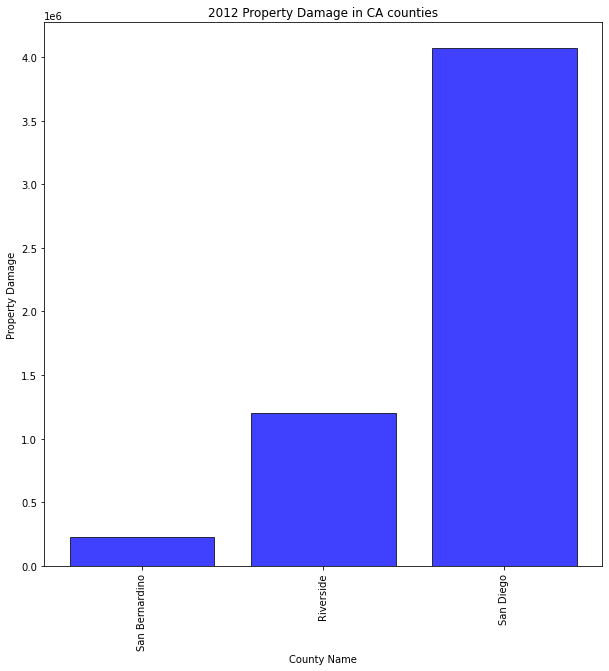

In [78]:
x_axis = np.arange(len(property_2012))
p_tick_loc = [value+0.4 for value in x_axis]
                         
plt.figure(figsize=(10,10))
plt.bar(x_axis , property_2012['Prop_Damage_2012'], color='b', alpha=0.75, align='edge', edgecolor='black')
plt.xticks(p_tick_loc, property_2012['County'], rotation='vertical')

plt.title('2012 Property Damage in CA counties')
plt.xlabel('County Name')
plt.ylabel('Property Damage')
plt.savefig('Chia_pngs/wildfires_2012', dpi=300, bbox_inches='tight')
plt.show()

In [55]:
property_2013 = property_wildfire.loc[(property_wildfire['Date'] == '2013')]
property_2013 = property_2013[['Date', 'County', 'Property Damage']]
property_2013 = property_2013.groupby(["Date", "County"]).sum().reset_index()
property_2013 = property_2013[['County', 'Property Damage']]
property_2013 = property_2013.rename(columns={'Property Damage': 'Prop_Damage_2013'})
property_2013 = property_2013.sort_values(by=['Prop_Damage_2013'])
property_2013

,County,Prop_Damage_2013
2,Orange,5000
0,Marin,505000
1,Napa,505000
6,Sonoma,505000
4,San Bernardino,1015000
5,San Diego,7255000
3,Riverside,9970000


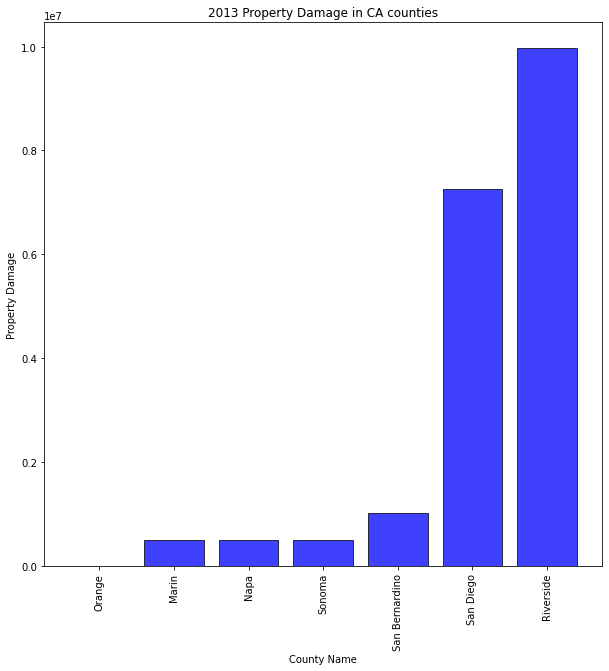

In [79]:
x_axis = np.arange(len(property_2013))
p_tick_loc = [value+0.4 for value in x_axis]
                         
plt.figure(figsize=(10,10))
plt.bar(x_axis , property_2013['Prop_Damage_2013'], color='b', alpha=0.75, align='edge', edgecolor='black')
plt.xticks(p_tick_loc, property_2013['County'], rotation='vertical')

plt.title('2013 Property Damage in CA counties')
plt.xlabel('County Name')
plt.ylabel('Property Damage')
plt.savefig('Chia_pngs/wildfires_2013', dpi=300, bbox_inches='tight')
plt.show()

In [57]:
property_2014 = property_wildfire.loc[(property_wildfire['Date'] == '2014')]
property_2014 = property_2014[['Date', 'County', 'Property Damage']]
property_2014 = property_2014.groupby(["Date", "County"]).sum().reset_index()
property_2014 = property_2014[['County', 'Property Damage']]
property_2014 = property_2014.rename(columns={'Property Damage': 'Prop_Damage_2014'})
property_2014 = property_2014.sort_values(by=['Prop_Damage_2014'])
property_2014

,County,Prop_Damage_2014
1,Orange,5000
4,San Bernardino,12000
2,Riverside,52000
0,Modoc,1000000
3,Sacramento,2500000
6,San Joaquin,2500000
8,Solano,2500000
7,Siskiyou,21400000
5,San Diego,30225000


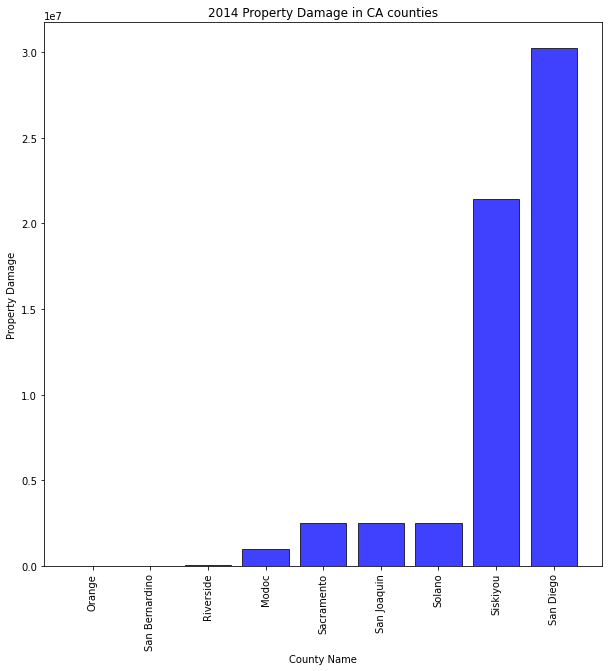

In [80]:
x_axis = np.arange(len(property_2014))
p_tick_loc = [value+0.4 for value in x_axis]
                         
plt.figure(figsize=(10,10))
plt.bar(x_axis , property_2014['Prop_Damage_2014'], color='b', alpha=0.75, align='edge', edgecolor='black')
plt.xticks(p_tick_loc, property_2014['County'], rotation='vertical')

plt.title('2014 Property Damage in CA counties')
plt.xlabel('County Name')
plt.ylabel('Property Damage')
plt.savefig('Chia_pngs/wildfires_2014', dpi=300, bbox_inches='tight')
plt.show()

In [59]:
property_2015 = property_wildfire.loc[(property_wildfire['Date'] == '2015')]
property_2015 = property_2015[['Date', 'County', 'Property Damage']]
property_2015 = property_2015.groupby(["Date", "County"]).sum().reset_index()
property_2015 = property_2015[['County', 'Property Damage']]
property_2015 = property_2015.rename(columns={'Property Damage': 'Prop_Damage_2015'})
property_2015 = property_2015.sort_values(by=['Prop_Damage_2015'])
property_2015

,County,Prop_Damage_2015
4,Inyo,1000
0,Alpine,25000
2,Calaveras,25000
5,Nevada,25000
9,Sierra,25000
12,Tuolumne,25000
14,Yuba,25000
7,Sacramento,500000
10,Solano,500000
11,Sutter,500000


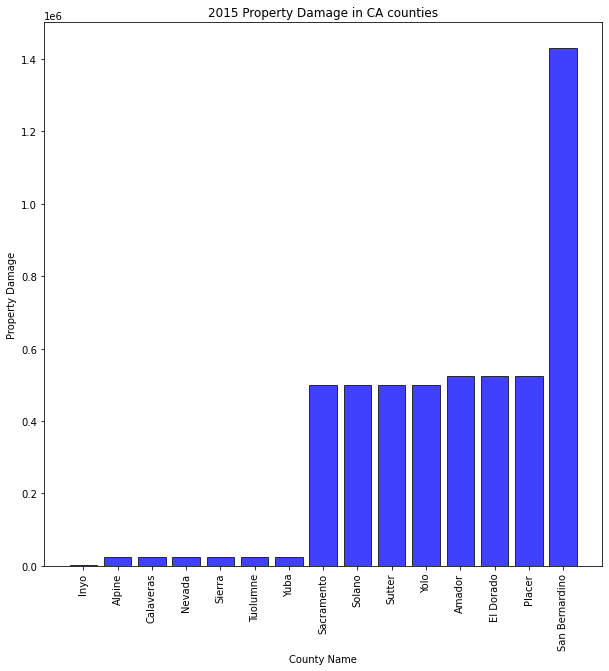

In [81]:
x_axis = np.arange(len(property_2015))
p_tick_loc = [value+0.4 for value in x_axis]
                         
plt.figure(figsize=(10,10))
plt.bar(x_axis , property_2015['Prop_Damage_2015'], color='b', alpha=0.75, align='edge', edgecolor='black')
plt.xticks(p_tick_loc, property_2015['County'], rotation='vertical')

plt.title('2015 Property Damage in CA counties')
plt.xlabel('County Name')
plt.ylabel('Property Damage')
plt.savefig('Chia_pngs/wildfires_2015', dpi=300, bbox_inches='tight')
plt.show()

In [61]:
property_2016 = property_wildfire.loc[(property_wildfire['Date'] == '2016')]
property_2016 = property_2016[['Date', 'County', 'Property Damage']]
property_2016 = property_2016.groupby(["Date", "County"]).sum().reset_index()
property_2016 = property_2016[['County', 'Property Damage']]
property_2016 = property_2016.rename(columns={'Property Damage': 'Prop_Damage_2016'})
property_2016 = property_2016.sort_values(by=['Prop_Damage_2016'])
property_2016

,County,Prop_Damage_2016
0,Riverside,50000
2,San Diego,4000000
1,San Bernardino,50050000


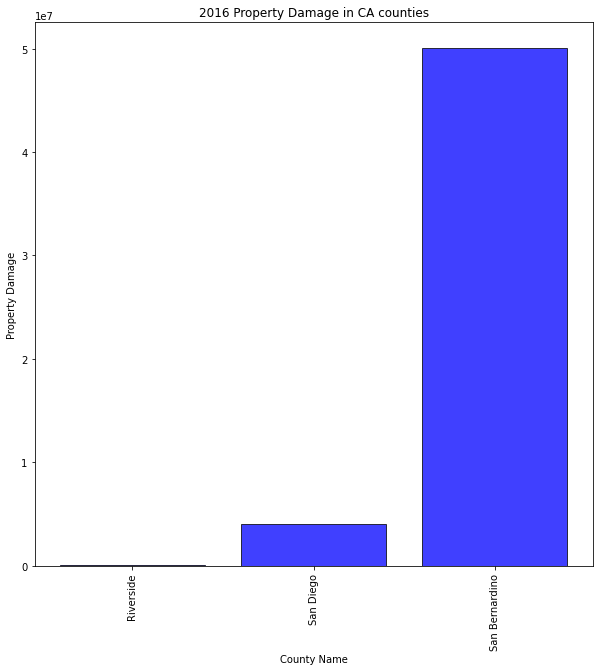

In [82]:
x_axis = np.arange(len(property_2016))
p_tick_loc = [value+0.4 for value in x_axis]
                         
plt.figure(figsize=(10,10))
plt.bar(x_axis , property_2016['Prop_Damage_2016'], color='b', alpha=0.75, align='edge', edgecolor='black')
plt.xticks(p_tick_loc, property_2016['County'], rotation='vertical')

plt.title('2016 Property Damage in CA counties')
plt.xlabel('County Name')
plt.ylabel('Property Damage')
plt.savefig('Chia_pngs/wildfires_2016', dpi=300, bbox_inches='tight')
plt.show()

In [65]:
property_2017 = property_wildfire.loc[(property_wildfire['Date'] == '2017')]
property_2017 = property_2017[['Date', 'County', 'Property Damage']]
property_2017 = property_2017.groupby(["Date", "County"]).sum().reset_index()
property_2017 = property_2017[['County', 'Property Damage']]
property_2017 = property_2017.rename(columns={'Property Damage': 'Prop_Damage_2017'})
property_2017 = property_2017.sort_values(by=['Prop_Damage_2017'])
property_2017

,County,Prop_Damage_2017
2,Riverside,1000000
3,Sacramento,2000000
5,San Joaquin,2000000
6,Solano,2000000
1,Orange,26000000
4,San Diego,31000000
0,Mendocino,38400000


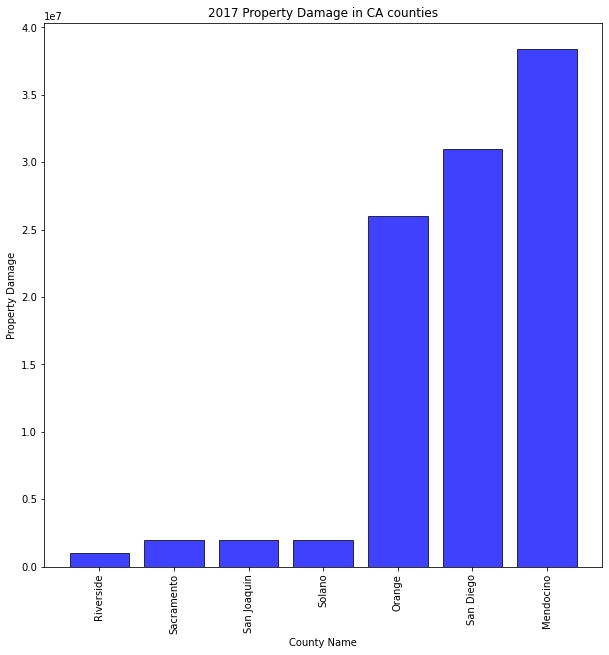

In [83]:
x_axis = np.arange(len(property_2017))
p_tick_loc = [value+0.4 for value in x_axis]
                         
plt.figure(figsize=(10,10))
plt.bar(x_axis , property_2017['Prop_Damage_2017'], color='b', alpha=0.75, align='edge', edgecolor='black')
plt.xticks(p_tick_loc, property_2017['County'], rotation='vertical')

plt.title('2017 Property Damage in CA counties')
plt.xlabel('County Name')
plt.ylabel('Property Damage')
plt.savefig('Chia_pngs/wildfires_2017', dpi=300, bbox_inches='tight')
plt.show()

In [67]:
property_2018 = property_wildfire.loc[(property_wildfire['Date'] == '2018')]
property_2018 = property_2018[['Date', 'County', 'Property Damage']]
property_2018 = property_2018.groupby(["Date", "County"]).sum().reset_index()
property_2018 = property_2018[['County', 'Property Damage']]
property_2018 = property_2018.rename(columns={'Property Damage': 'Prop_Damage_2018'})
property_2018 = property_2018.sort_values(by=['Prop_Damage_2018'])
property_2018

,County,Prop_Damage_2018
3,Orange,500000
5,San Diego,1000000
4,Riverside,1300000
1,Colusa,56000000
2,Glenn,56000000
0,Butte,17000000000
6,Shasta,18556000000
7,Tehama,18556000000


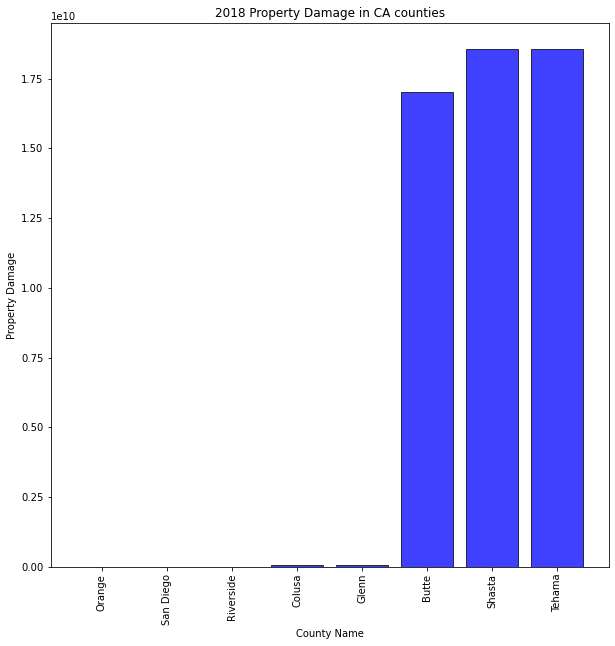

In [84]:
x_axis = np.arange(len(property_2018))
p_tick_loc = [value+0.4 for value in x_axis]
                         
plt.figure(figsize=(10,10))
plt.bar(x_axis , property_2018['Prop_Damage_2018'], color='b', alpha=0.75, align='edge', edgecolor='black')
plt.xticks(p_tick_loc, property_2018['County'], rotation='vertical')

plt.title('2018 Property Damage in CA counties')
plt.xlabel('County Name')
plt.ylabel('Property Damage')
plt.savefig('Chia_pngs/wildfires_2018', dpi=300, bbox_inches='tight')
plt.show()

In [69]:
property_2019 = property_wildfire.loc[(property_wildfire['Date'] == '2019')]
property_2019 = property_2019[['Date', 'County', 'Property Damage']]
property_2019 = property_2019.groupby(["Date", "County"]).sum().reset_index()
property_2019 = property_2019[['County', 'Property Damage']]
property_2019 = property_2019.rename(columns={'Property Damage': 'Prop_Damage_2019'})
property_2019 = property_2019.sort_values(by=['Prop_Damage_2019'])
property_2019

,County,Prop_Damage_2019
6,Santa Clara,5000
0,Alameda,10000
1,Contra Costa,10000
5,San Diego,50000
2,Inyo,100000
3,Riverside,12800000
4,San Bernardino,12800000


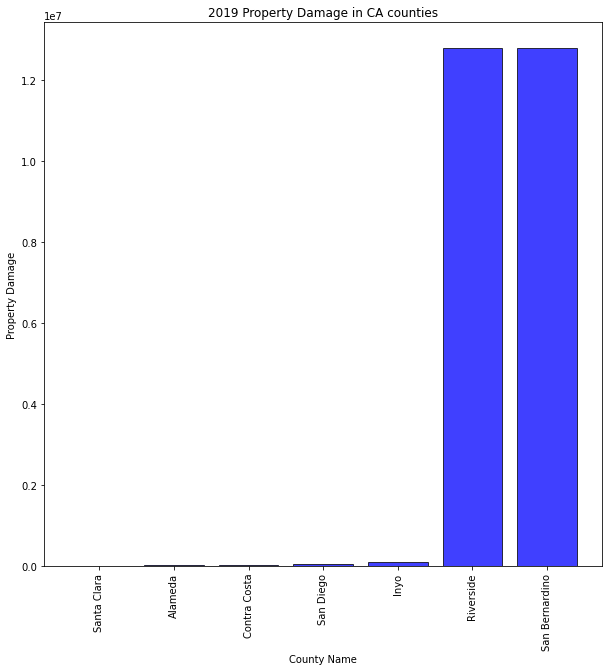

In [85]:
x_axis = np.arange(len(property_2019))
p_tick_loc = [value+0.4 for value in x_axis]
                         
plt.figure(figsize=(10,10))
plt.bar(x_axis , property_2019['Prop_Damage_2019'], color='b', alpha=0.75, align='edge', edgecolor='black')
plt.xticks(p_tick_loc, property_2019['County'], rotation='vertical')

plt.title('2019 Property Damage in CA counties')
plt.xlabel('County Name')
plt.ylabel('Property Damage')
plt.savefig('Chia_pngs/wildfires_2019', dpi=300, bbox_inches='tight')
plt.show()

In [72]:
merge_1011 = pd.merge(property_2010, property_2011, on='County', how='outer')
merge_1012 = pd.merge(merge_1011, property_2012, on='County', how='outer')
merge_1013 = pd.merge(merge_1012, property_2013, on='County', how='outer')
merge_1014 = pd.merge(merge_1013, property_2014, on='County', how='outer')
merge_1015 = pd.merge(merge_1014, property_2015, on='County', how='outer')
merge_1016 = pd.merge(merge_1015, property_2016, on='County', how='outer')
merge_1017 = pd.merge(merge_1016, property_2017, on='County', how='outer')
merge_1018 = pd.merge(merge_1017, property_2018, on='County', how='outer')
merge_1019 = pd.merge(merge_1018, property_2019, on='County', how='outer')
merge_1019 = merge_1019.sort_values(by=['County'])
merge_1019

,County,Prop_Damage_2010,Prop_Damage_2011,Prop_Damage_2012,Prop_Damage_2013,Prop_Damage_2014,Prop_Damage_2015,Prop_Damage_2016,Prop_Damage_2017,Prop_Damage_2018,Prop_Damage_2019
31,Alameda,nan,nan,nan,nan,nan,nan,nan,nan,nan,10000
13,Alpine,nan,nan,nan,nan,nan,25000,nan,nan,nan,nan
21,Amador,nan,nan,nan,nan,nan,525000,nan,nan,nan,nan
27,Butte,nan,nan,nan,nan,nan,nan,nan,nan,17000000000,nan
14,Calaveras,nan,nan,nan,nan,nan,25000,nan,nan,nan,nan
25,Colusa,nan,nan,nan,nan,nan,nan,nan,nan,56000000,nan
32,Contra Costa,nan,nan,nan,nan,nan,nan,nan,nan,nan,10000
22,El Dorado,nan,nan,nan,nan,nan,525000,nan,nan,nan,nan
26,Glenn,nan,nan,nan,nan,nan,nan,nan,nan,56000000,nan
4,Inyo,nan,4500000,nan,nan,nan,1000,nan,nan,nan,100000
